In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Load the datasets
users = pd.read_csv(r"C:\Users\Owner\OneDrive\Desktop\Amity university major project\Users.csv")
books = pd.read_csv(r"C:\Users\Owner\OneDrive\Desktop\Amity university major project\Books.csv", low_memory=False)
ratings = pd.read_csv(r"C:\Users\Owner\OneDrive\Desktop\Amity university major project\Ratings.csv")


In [5]:
# Check the shape of the datasets
print("Shape of the Book Dataset:", books.shape)
print("Shape of the Users Dataset:", users.shape)
print("Shape of the Ratings Dataset:", ratings.shape)


Shape of the Book Dataset: (271360, 8)
Shape of the Users Dataset: (278858, 3)
Shape of the Ratings Dataset: (1149780, 3)


In [6]:
# Display the first five rows of the books dataset
print("First five rows of the books dataset:\n", books.head())


First five rows of the books dataset:
          ISBN                                         Book-Title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

            Book-Author Year-Of-Publication                   Publisher  \
0    Mark P. O. Morford                2002     Oxford University Press   
1  Richard Bruce Wright                2001       HarperFlamingo Canada   
2          Carlo D'Este                1991             HarperPerennial   
3      Gina Bari Kolata                1999        Farrar Straus Giroux   
4       E. J. W. Barber                1999  W. W. Norton &amp; Company   

                                         Image-URL-S  \
0  http://images.amazon.com/images/P/01951534

In [7]:
# Describe the books dataset
print("Books dataset description:\n", books.describe())


Books dataset description:
               ISBN      Book-Title      Book-Author Year-Of-Publication  \
count       271360          271360           271358              271360   
unique      271360          242135           102022                 118   
top     0195153448  Selected Poems  Agatha Christie                2002   
freq             1              27              632               17627   

        Publisher                                        Image-URL-S  \
count      271358                                             271360   
unique      16807                                             271044   
top     Harlequin  http://images.amazon.com/images/P/185326119X.0...   
freq         7535                                                  2   

                                              Image-URL-M  \
count                                              271360   
unique                                             271044   
top     http://images.amazon.com/images/P/185326119X

In [8]:
# Check the data type of each column in the books dataset
print("Books dataset data types:\n", books.dtypes)


Books dataset data types:
 ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object


In [9]:
# Check for null values in the books dataset
null_values = books.isnull().sum()
print("Null values in each column:\n", null_values)

# Check for blank values (empty strings) in each column of the books dataset
blank_values = (books.applymap(lambda x: x == '')).sum()
print("Blank values in each column:\n", blank_values)


Null values in each column:
 ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64


C:\Users\Owner\AppData\Local\Temp\ipykernel_7772\3551936034.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  blank_values = (books.applymap(lambda x: x == '')).sum()


Blank values in each column:
 ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64


In [10]:
# Replace null values in 'Book-Author' and 'Publisher' columns with 'missing'
books['Book-Author'].fillna('missing', inplace=True)
books['Publisher'].fillna('missing', inplace=True)

# Check for null values after replacement
null_values = books.isnull().sum()
print("Null values in each column after replacement:\n", null_values)


Null values in each column after replacement:
 ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64


C:\Users\Owner\AppData\Local\Temp\ipykernel_7772\2106806260.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  books['Book-Author'].fillna('missing', inplace=True)
C:\Users\Owner\AppData\Local\Temp\ipykernel_7772\2106806260.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [11]:
# Convert 'Year-Of-Publication' column to numeric, setting errors to 'coerce' (convert invalid parsing to NaN)
books['Year-Of-Publication'] = pd.to_numeric(books['Year-Of-Publication'], errors='coerce')

# Print unique years of publication
years = books['Year-Of-Publication'].unique()
years.sort()
print("Unique Years of Publication:\n", years)

# Replace NaN values in 'Year-Of-Publication' with 2024
books['Year-Of-Publication'].fillna(2024, inplace=True)

# Check for books published before 1800 and after 2024
invalid_years = books[(books['Year-Of-Publication'] < 1800) | (books['Year-Of-Publication'] > 2024)]
print("Books with invalid publication years:\n", invalid_years)

# Change the data type of 'Year-Of-Publication' column to integer
books['Year-Of-Publication'] = books['Year-Of-Publication'].astype(int)

# Replace years before 1800 with 1800 and years after 2024 with 2024
books.loc[books['Year-Of-Publication'] < 1800, 'Year-Of-Publication'] = 1800
books.loc[books['Year-Of-Publication'] > 2024, 'Year-Of-Publication'] = 2024

# Verify the replacement
print("Books with year 1800:\n", books[books['Year-Of-Publication'] == 1800].value_counts())
print("Books with year 2024:\n", books[books['Year-Of-Publication'] == 2024].value_counts())


Unique Years of Publication:
 [   0. 1376. 1378. 1806. 1897. 1900. 1901. 1902. 1904. 1906. 1908. 1909.
 1910. 1911. 1914. 1917. 1919. 1920. 1921. 1922. 1923. 1924. 1925. 1926.
 1927. 1928. 1929. 1930. 1931. 1932. 1933. 1934. 1935. 1936. 1937. 1938.
 1939. 1940. 1941. 1942. 1943. 1944. 1945. 1946. 1947. 1948. 1949. 1950.
 1951. 1952. 1953. 1954. 1955. 1956. 1957. 1958. 1959. 1960. 1961. 1962.
 1963. 1964. 1965. 1966. 1967. 1968. 1969. 1970. 1971. 1972. 1973. 1974.
 1975. 1976. 1977. 1978. 1979. 1980. 1981. 1982. 1983. 1984. 1985. 1986.
 1987. 1988. 1989. 1990. 1991. 1992. 1993. 1994. 1995. 1996. 1997. 1998.
 1999. 2000. 2001. 2002. 2003. 2004. 2005. 2006. 2008. 2010. 2011. 2012.
 2020. 2021. 2024. 2026. 2030. 2037. 2038. 2050.   nan]
Books with invalid publication years:
               ISBN                                         Book-Title  \
176     3150000335                                   Kabale Und Liebe   
188     342311360X                            Die Liebe in Den Zelten   

C:\Users\Owner\AppData\Local\Temp\ipykernel_7772\1399133054.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  books['Year-Of-Publication'].fillna(2024, inplace=True)


Top 10 most common publishers:
 Publisher
Harlequin                   7535
Silhouette                  4220
Pocket                      3905
Ballantine Books            3783
Bantam Books                3646
Scholastic                  3160
Simon &amp; Schuster        2971
Penguin Books               2844
Berkley Publishing Group    2771
Warner Books                2727
Name: count, dtype: int64
Top 10 most common authors:
 Book-Author
Agatha Christie        632
William Shakespeare    567
Stephen King           524
Ann M. Martin          423
Carolyn Keene          373
Francine Pascal        372
Isaac Asimov           330
Nora Roberts           315
Barbara Cartland       307
Charles Dickens        302
Name: count, dtype: int64


D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


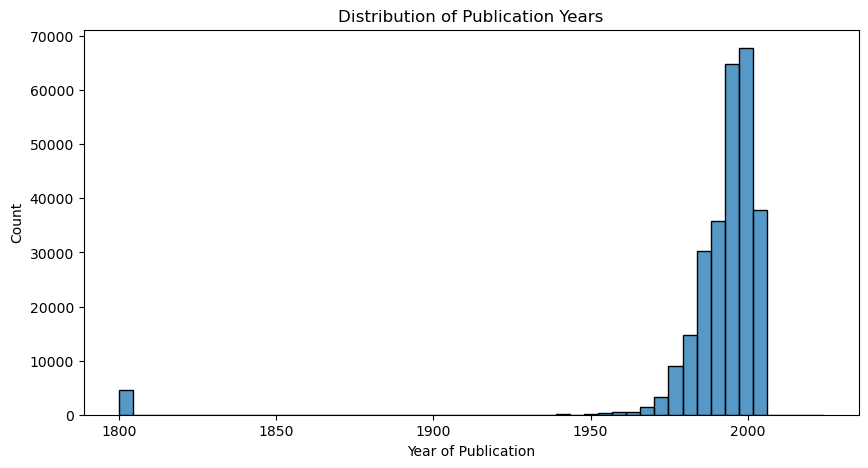

In [12]:
# Additional EDA 
print("Top 10 most common publishers:\n", books['Publisher'].value_counts().head(10))
print("Top 10 most common authors:\n", books['Book-Author'].value_counts().head(10))

# Visualize the distribution of publication years
plt.figure(figsize=(10, 5))
sns.histplot(books['Year-Of-Publication'], bins=50, kde=False)
plt.title('Distribution of Publication Years')
plt.xlabel('Year of Publication')
plt.ylabel('Count')
plt.show()


In [13]:
# Display the first five rows of the users dataset
print("First five rows of the users dataset:\n", users.head())


First five rows of the users dataset:
    User-ID                            Location   Age
0        1                  nyc, new york, usa   NaN
1        2           stockton, california, usa  18.0
2        3     moscow, yukon territory, russia   NaN
3        4           porto, v.n.gaia, portugal  17.0
4        5  farnborough, hants, united kingdom   NaN


In [14]:
# Describe the users dataset
print("Users dataset description:\n", users.describe())

Users dataset description:
             User-ID            Age
count  278858.00000  168096.000000
mean   139429.50000      34.751434
std     80499.51502      14.428097
min         1.00000       0.000000
25%     69715.25000      24.000000
50%    139429.50000      32.000000
75%    209143.75000      44.000000
max    278858.00000     244.000000


In [15]:
# Check the data type of each column in the users dataset
print("Users dataset data types:\n", users.dtypes)


Users dataset data types:
 User-ID       int64
Location     object
Age         float64
dtype: object


In [16]:
# Check for null values in the users dataset
null_values = users.isnull().sum()
print("Null values in each column:\n", null_values)

# Check for blank values (empty strings) in each column of the users dataset
blank_values = (users.applymap(lambda x: x == '')).sum()
print("Blank values in each column:\n", blank_values)


Null values in each column:
 User-ID          0
Location         0
Age         110762
dtype: int64
Blank values in each column:
 User-ID     0
Location    0
Age         0
dtype: int64


C:\Users\Owner\AppData\Local\Temp\ipykernel_7772\4059264463.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  blank_values = (users.applymap(lambda x: x == '')).sum()


In [17]:
# Replace null 'Age' values with the average age
average_age = users['Age'].mean(skipna=True)
users['Age'].fillna(average_age, inplace=True)

# Verify replacement of null values
null_values_after = users.isnull().sum()
print("Null values after replacement:\n", null_values_after)

# Convert the data type of 'Age' column to integer
users['Age'] = users['Age'].astype(int)

# Verify the data type change
print("Users dataset data types after conversion:\n", users.dtypes)


Null values after replacement:
 User-ID     0
Location    0
Age         0
dtype: int64
Users dataset data types after conversion:
 User-ID      int64
Location    object
Age          int32
dtype: object


C:\Users\Owner\AppData\Local\Temp\ipykernel_7772\4049978772.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  users['Age'].fillna(average_age, inplace=True)


Age distribution of users:
 count    278858.000000
mean         34.452965
std          11.208036
min           0.000000
25%          29.000000
50%          34.000000
75%          35.000000
max         244.000000
Name: Age, dtype: float64


D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


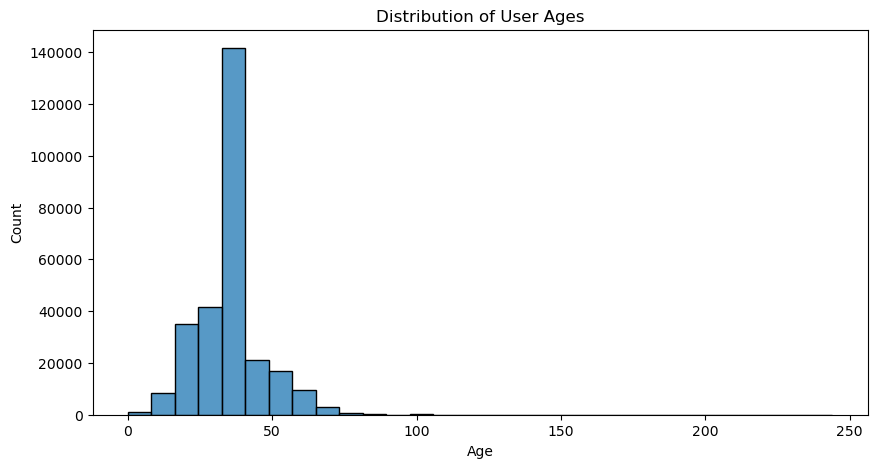

In [18]:
# Additional EDA 
print("Age distribution of users:\n", users['Age'].describe())

# Visualize the distribution of user ages
plt.figure(figsize=(10, 5))
sns.histplot(users['Age'], bins=30, kde=False)
plt.title('Distribution of User Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


In [19]:
# Display the first five rows of the ratings dataset
print("First five rows of the ratings dataset:\n", ratings.head())


First five rows of the ratings dataset:
    User-ID        ISBN  Book-Rating
0   276725  034545104X            0
1   276726  0155061224            5
2   276727  0446520802            0
3   276729  052165615X            3
4   276729  0521795028            6


In [20]:
# Describe the ratings dataset
print("Ratings dataset description:\n", ratings.describe())


Ratings dataset description:
             User-ID   Book-Rating
count  1.149780e+06  1.149780e+06
mean   1.403864e+05  2.866950e+00
std    8.056228e+04  3.854184e+00
min    2.000000e+00  0.000000e+00
25%    7.034500e+04  0.000000e+00
50%    1.410100e+05  0.000000e+00
75%    2.110280e+05  7.000000e+00
max    2.788540e+05  1.000000e+01


In [21]:
# Check the data type of each column in the ratings dataset
print("Ratings dataset data types:\n", ratings.dtypes)


Ratings dataset data types:
 User-ID         int64
ISBN           object
Book-Rating     int64
dtype: object


In [22]:
# Check for null values in the ratings dataset
null_values = ratings.isnull().sum()
print("Null values in each column:\n", null_values)

# Check for blank values (empty strings) in each column of the ratings dataset
blank_values = (ratings.applymap(lambda x: x == '')).sum()
print("Blank values in each column:\n", blank_values)


Null values in each column:
 User-ID        0
ISBN           0
Book-Rating    0
dtype: int64


C:\Users\Owner\AppData\Local\Temp\ipykernel_7772\1419675284.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  blank_values = (ratings.applymap(lambda x: x == '')).sum()


Blank values in each column:
 User-ID        0
ISBN           0
Book-Rating    0
dtype: int64


Distribution of book ratings:
 Book-Rating
0     716109
8     103736
10     78610
7      76457
9      67541
5      50974
6      36924
4       8904
3       5996
2       2759
1       1770
Name: count, dtype: int64


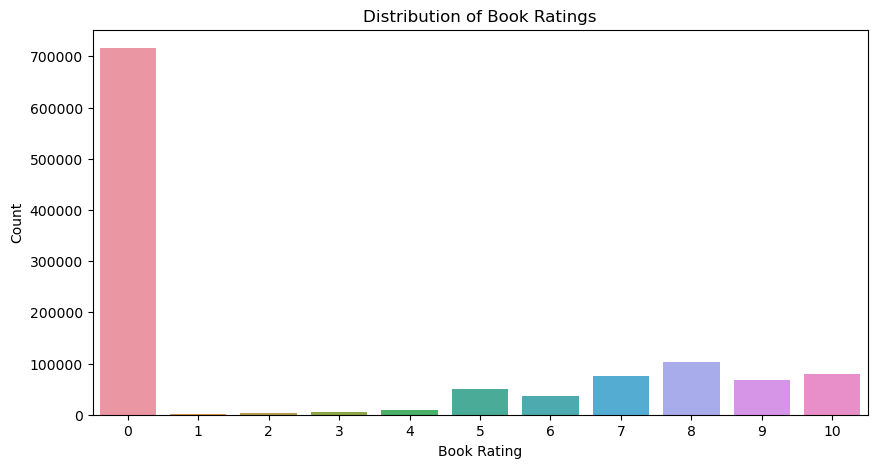

In [23]:
# Display the distribution of 'Book-Rating' values
print("Distribution of book ratings:\n", ratings['Book-Rating'].value_counts())

# Visualize the distribution of book ratings
plt.figure(figsize=(10, 5))
sns.countplot(x='Book-Rating', data=ratings)
plt.title('Distribution of Book Ratings')
plt.xlabel('Book Rating')
plt.ylabel('Count')
plt.show()


In [24]:
# Check for duplicate values in each dataset
print("Duplicate values in Books Dataset:", books.duplicated().sum())
print("Duplicate values in Users Dataset:", users.duplicated().sum())
print("Duplicate values in Ratings Dataset:", ratings.duplicated().sum())


Duplicate values in Books Dataset: 0
Duplicate values in Users Dataset: 0
Duplicate values in Ratings Dataset: 0


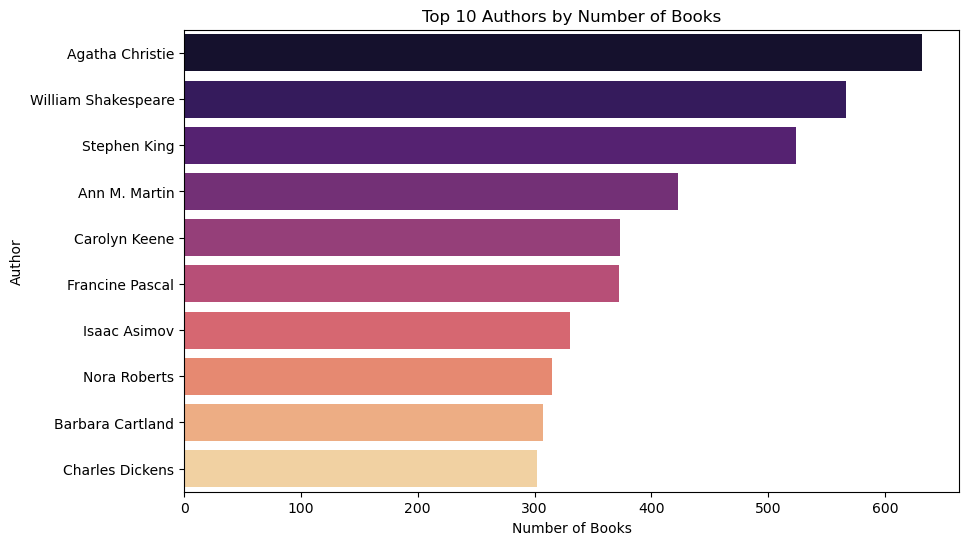

In [25]:
#top 10 Authors 
plt.figure(figsize=(10, 6))
top_authors = books['Book-Author'].value_counts().head(10)
sns.barplot(y=top_authors.index, x=top_authors.values, palette='magma')
plt.title('Top 10 Authors by Number of Books')
plt.xlabel('Number of Books')
plt.ylabel('Author')
plt.show()

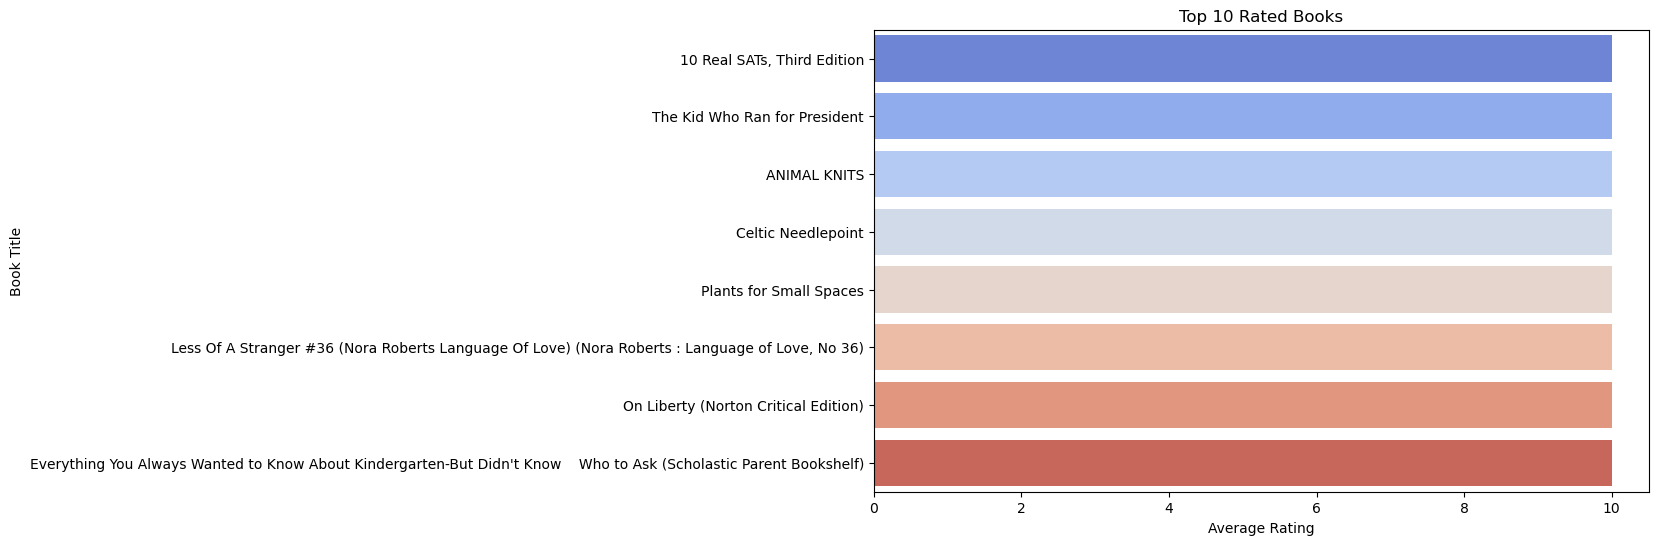

In [26]:
# top 10 rated books by users 
plt.figure(figsize=(10, 6))
average_ratings = ratings.groupby('ISBN')['Book-Rating'].mean().sort_values(ascending=False).head(10)
top_rated_books = pd.merge(average_ratings, books, on='ISBN')
sns.barplot(y=top_rated_books['Book-Title'], x=top_rated_books['Book-Rating'], palette='coolwarm')
plt.title('Top 10 Rated Books')
plt.xlabel('Average Rating')
plt.ylabel('Book Title')
plt.show()


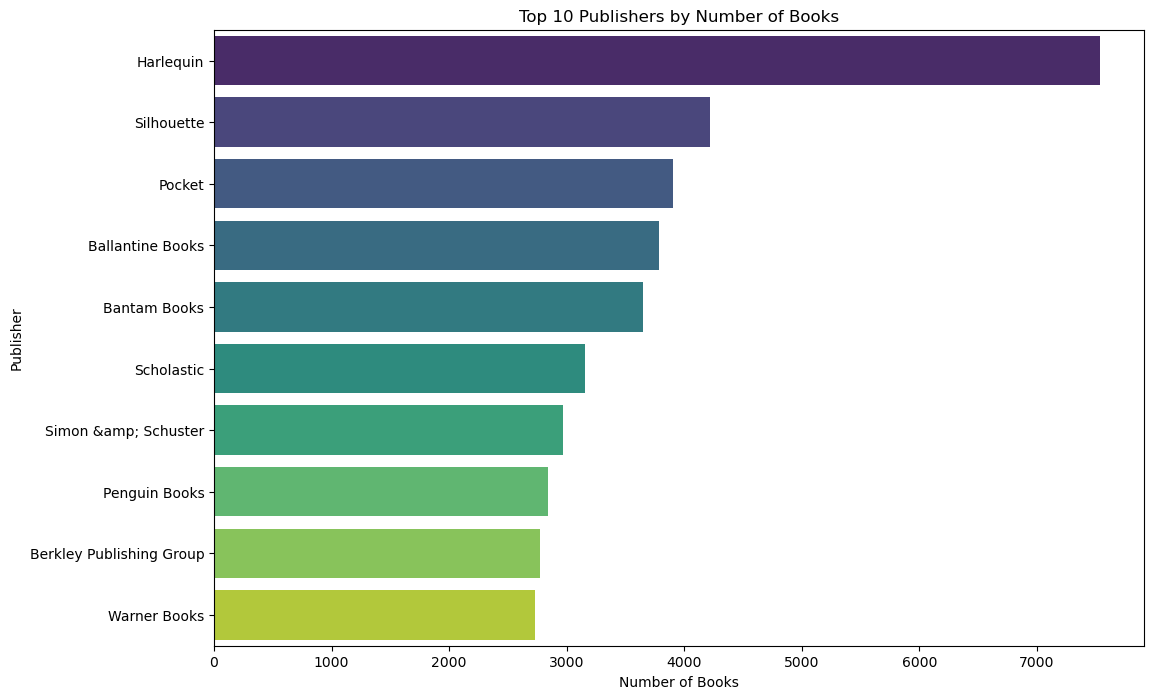

In [27]:
# top 10 publishers according to dataset 
plt.figure(figsize=(12, 8))
top_publishers = books['Publisher'].value_counts().head(10)
sns.barplot(y=top_publishers.index, x=top_publishers.values, palette='viridis')
plt.title('Top 10 Publishers by Number of Books')
plt.xlabel('Number of Books')
plt.ylabel('Publisher')
plt.show()

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


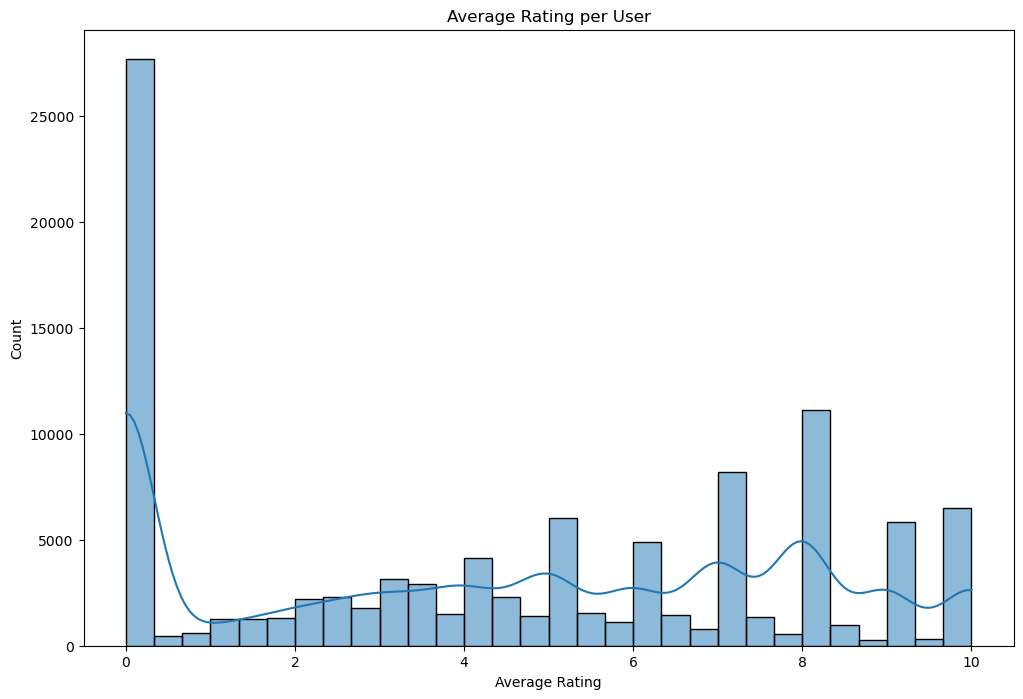

In [28]:
# average ratings 
average_rating_per_user = ratings.groupby('User-ID')['Book-Rating'].mean()

plt.figure(figsize=(12, 8))
sns.histplot(average_rating_per_user, bins=30, kde=True)
plt.title('Average Rating per User')
plt.xlabel('Average Rating')
plt.ylabel('Count')
plt.show()

## Popularity Based Recommender System

In [29]:
#merging isbn column of ratings and books 
ratings_with_name = ratings.merge(books,on='ISBN')

In [30]:
ratings_with_name


,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...
...,...,...,...,...,...,...,...,...,...,...
1031131,276704,0876044011,0,Edgar Cayce on the Akashic Records: The Book o...,Kevin J. Todeschi,1998,A.R.E. Press (Association of Research &amp; Enlig,http://images.amazon.com/images/P/0876044011.0...,http://images.amazon.com/images/P/0876044011.0...,http://images.amazon.com/images/P/0876044011.0...
1031132,276704,1563526298,9,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,2000,Longstreet Press,http://images.amazon.com/images/P/1563526298.0...,http://images.amazon.com/images/P/1563526298.0...,http://images.amazon.com/images/P/1563526298.0...
1031133,276706,0679447156,0,Eight Weeks to Optimum Health: A Proven Progra...,Andrew Weil,1997,Alfred A. Knopf,http://images.amazon.com/images/P/0679447156.0...,http://images.amazon.com/images/P/0679447156.0...,http://images.amazon.com/images/P/0679447156.0...
1031134,276709,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996,Jove Books,http://images.amazon.com/images/P/0515107662.0...,http://images.amazon.com/images/P/0515107662.0...,http://images.amazon.com/images/P/0515107662.0...


In [43]:
num_rating_df = ratings_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating_df.rename(columns={'Book-Rating' : 'num_ratings'},inplace=True)

In [44]:
num_rating_df

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [47]:
# Assuming ratings_with_name is your DataFrame

# Step 1: Identify non-numeric values in 'Book-Rating' column
non_numeric_ratings = ratings_with_name[ratings_with_name['Book-Rating'].apply(lambda x: pd.to_numeric(x, errors='coerce')).isna()]
print("Non-numeric ratings:\n", non_numeric_ratings['Book-Rating'].unique())

# Step 2: Convert 'Book-Rating' to numeric, coercing errors
ratings_with_name['Book-Rating'] = pd.to_numeric(ratings_with_name['Book-Rating'], errors='coerce')

# Step 3: Drop rows with NaN values in 'Book-Rating' after conversion
ratings_with_name = ratings_with_name.dropna(subset=['Book-Rating'])

# Step 4: Group by 'Book-Title' and calculate the mean rating
avg_rating_df = ratings_with_name.groupby('Book-Title').mean(numeric_only=True)['Book-Rating'].reset_index()

# Rename the column
avg_rating_df.rename(columns={'Book-Rating': 'avg_ratings'}, inplace=True)

# Display the resulting DataFrame
print(avg_rating_df)

Non-numeric ratings:
 []
                                               Book-Title  avg_ratings
0        A Light in the Storm: The Civil War Diary of ...     2.250000
1                                   Always Have Popsicles     0.000000
2                    Apple Magic (The Collector's series)     0.000000
3        Ask Lily (Young Women of Faith: Lily Series, ...     8.000000
4        Beyond IBM: Leadership Marketing and Finance ...     0.000000
...                                                   ...          ...
241066                                      Ã?Â?lpiraten.     0.000000
241067                     Ã?Â?rger mit Produkt X. Roman.     5.250000
241068                                Ã?Â?sterlich leben.     7.000000
241069                              Ã?Â?stlich der Berge.     2.666667
241070                                  Ã?Â?thique en toc     4.000000

[241071 rows x 2 columns]


In [48]:
popular_df = num_rating_df.merge(avg_rating_df,on='Book-Title')
popular_df


,Book-Title,num_ratings,avg_ratings
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Â?sterlich leben.,1,7.000000
241069,Ã?Â?stlich der Berge.,3,2.666667


In [49]:
popular_df[popular_df['num_ratings']>=250]


,Book-Title,num_ratings,avg_ratings
764,1984,284,4.454225
818,1st to Die: A Novel,509,3.575639
1048,2nd Chance,356,3.269663
1760,A Bend in the Road,346,3.364162
2281,"A Child Called \It\"": One Child's Courage to S...",265,4.086792
...,...,...,...
233850,White Oleander : A Novel,387,3.506460
233851,White Oleander : A Novel (Oprah's Book Club),356,3.772472
234740,Wicked: The Life and Times of the Wicked Witch...,326,3.766871
234951,Wild Animus,2502,1.019584


In [50]:
popular_df = popular_df[popular_df['num_ratings']>=250].sort_values('avg_ratings',ascending = False).head(50)

In [51]:
popular_df.merge(books,on='Book-Title').drop_duplicates('Book-Title')

,Book-Title,num_ratings,avg_ratings,ISBN,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804,0439136350,J. K. Rowling,1999,Scholastic,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...
3,Harry Potter and the Goblet of Fire (Book 4),387,5.824289,0439139597,J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...
5,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410,0590353403,J. K. Rowling,1998,Scholastic,http://images.amazon.com/images/P/0590353403.0...,http://images.amazon.com/images/P/0590353403.0...,http://images.amazon.com/images/P/0590353403.0...
9,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441,043935806X,J. K. Rowling,2003,Scholastic,http://images.amazon.com/images/P/043935806X.0...,http://images.amazon.com/images/P/043935806X.0...,http://images.amazon.com/images/P/043935806X.0...
13,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453,0439064872,J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439064872.0...,http://images.amazon.com/images/P/0439064872.0...,http://images.amazon.com/images/P/0439064872.0...
16,The Hobbit : The Enchanting Prelude to The Lor...,281,5.007117,0345339681,J.R.R. TOLKIEN,1986,Del Rey,http://images.amazon.com/images/P/0345339681.0...,http://images.amazon.com/images/P/0345339681.0...,http://images.amazon.com/images/P/0345339681.0...
17,The Fellowship of the Ring (The Lord of the Ri...,368,4.948370,0345339703,J.R.R. TOLKIEN,1986,Del Rey,http://images.amazon.com/images/P/0345339703.0...,http://images.amazon.com/images/P/0345339703.0...,http://images.amazon.com/images/P/0345339703.0...
26,Harry Potter and the Sorcerer's Stone (Harry P...,575,4.895652,059035342X,J. K. Rowling,1999,Arthur A. Levine Books,http://images.amazon.com/images/P/059035342X.0...,http://images.amazon.com/images/P/059035342X.0...,http://images.amazon.com/images/P/059035342X.0...
28,"The Two Towers (The Lord of the Rings, Part 2)",260,4.880769,0345339711,J.R.R. TOLKIEN,1986,Del Rey,http://images.amazon.com/images/P/0345339711.0...,http://images.amazon.com/images/P/0345339711.0...,http://images.amazon.com/images/P/0345339711.0...
39,To Kill a Mockingbird,510,4.700000,0446310786,Harper Lee,1988,Little Brown &amp; Company,http://images.amazon.com/images/P/0446310786.0...,http://images.amazon.com/images/P/0446310786.0...,http://images.amazon.com/images/P/0446310786.0...


In [52]:
popular_df = popular_df.merge(books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-M','num_ratings','avg_ratings']]

In [84]:
popular_df['Image-URL-M'][3]

'http://images.amazon.com/images/P/0439139597.01.MZZZZZZZ.jpg'

## Collaborative Filtering Based Recommender System

In [63]:
x = ratings_with_name.groupby('User-ID').count()['Book-Rating'] > 200
intelligent_users = x[x].index


In [64]:
filtered_rating = ratings_with_name[ratings_with_name['User-ID'].isin(intelligent_users)]

In [72]:
filtered_rating

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
1150,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
1151,277427,0026217457,0,Vegetarian Times Complete Cookbook,Lucy Moll,1995,John Wiley &amp; Sons,http://images.amazon.com/images/P/0026217457.0...,http://images.amazon.com/images/P/0026217457.0...,http://images.amazon.com/images/P/0026217457.0...
1152,277427,003008685X,8,Pioneers,James Fenimore Cooper,1974,Thomson Learning,http://images.amazon.com/images/P/003008685X.0...,http://images.amazon.com/images/P/003008685X.0...,http://images.amazon.com/images/P/003008685X.0...
1153,277427,0030615321,0,"Ask for May, Settle for June (A Doonesbury book)",G. B. Trudeau,1982,Henry Holt &amp; Co,http://images.amazon.com/images/P/0030615321.0...,http://images.amazon.com/images/P/0030615321.0...,http://images.amazon.com/images/P/0030615321.0...
1154,277427,0060002050,0,On a Wicked Dawn (Cynster Novels),Stephanie Laurens,2002,Avon Books,http://images.amazon.com/images/P/0060002050.0...,http://images.amazon.com/images/P/0060002050.0...,http://images.amazon.com/images/P/0060002050.0...
...,...,...,...,...,...,...,...,...,...,...
1029357,275970,1931868123,0,There's a Porcupine in My Outhouse: Misadventu...,Mike Tougias,2002,Capital Books (VA),http://images.amazon.com/images/P/1931868123.0...,http://images.amazon.com/images/P/1931868123.0...,http://images.amazon.com/images/P/1931868123.0...
1029358,275970,3411086211,10,Die Biene.,Sybil GrÃ?Â¤fin SchÃ?Â¶nfeldt,1993,"Bibliographisches Institut, Mannheim",http://images.amazon.com/images/P/3411086211.0...,http://images.amazon.com/images/P/3411086211.0...,http://images.amazon.com/images/P/3411086211.0...
1029359,275970,3829021860,0,The Penis Book,Joseph Cohen,1999,Konemann,http://images.amazon.com/images/P/3829021860.0...,http://images.amazon.com/images/P/3829021860.0...,http://images.amazon.com/images/P/3829021860.0...
1029360,275970,4770019572,0,Musashi,Eiji Yoshikawa,1995,Kodansha International (JPN),http://images.amazon.com/images/P/4770019572.0...,http://images.amazon.com/images/P/4770019572.0...,http://images.amazon.com/images/P/4770019572.0...


In [70]:
y = filtered_rating.groupby('Book-Title').count()['Book-Rating']>=50
famous_books = y[y].index


In [73]:
final_rating = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]

In [75]:
pt = final_rating.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')

In [76]:
pt.fillna(0,inplace=True)

In [77]:
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [78]:
from sklearn.metrics.pairwise import cosine_similarity


In [79]:
similarity_scores = cosine_similarity(pt)


In [80]:
similarity_scores.shape

(706, 706)

In [81]:
def recommend(book_name):
    #index fetching
    index = np.where(pt.index == book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key = lambda x:x[1],reverse = True)[1:10]
    
    for i in similar_items:
        print(pt.index[i[0]])
    

In [82]:
recommend('The Da Vinci Code')

Angels &amp; Demons
Touching Evil
Saving Faith
The Sweet Potato Queens' Book of Love
Middlesex: A Novel
The Lovely Bones: A Novel
Timeline
The Blue Nowhere : A Novel
Sea Glass: A Novel


In [91]:
 pt.index[555]

'The Hunt for Red October'